In [1]:
import numpy as np
import pandas as pd
from soak_low_level import SOAKFold

In [2]:
dataset = 'WorkersCompensation'
target_col = 'UltimateIncurredClaimCost'
subset_col = 'Gender'

In [3]:
# Load data
data = np.genfromtxt(f'data/{dataset}.csv.xz', delimiter=',', dtype=None, names=True, encoding=None)
X = np.column_stack([data[name] for name in data.dtype.names if name.startswith('X_')])
y = data[target_col]
subset_vec = data[subset_col]

# replace orignal label by its log scaled, then normalize it
y = np.log(y)
y = (y - np.mean(y)) / np.std(y)

In [4]:
model_list = ['featureless', 'linear']

In [5]:
# initial soak obj
soak_obj = SOAKFold(n_splits=5)

In [6]:
# generate dataframe of results:
results = []
for subset_value, category, X_train, y_train, X_test, y_test in soak_obj.split(X, y, subset_vec):
    for model in model_list:
        rmse, mae = soak_obj.model_eval(X_train, y_train, X_test, y_test, model)
        results.append({
                    "subset": subset_value,
                    "category": category,
                    "model": model,
                    "rmse": rmse,
                    "mae": mae,
                })
results_df = pd.DataFrame(results)

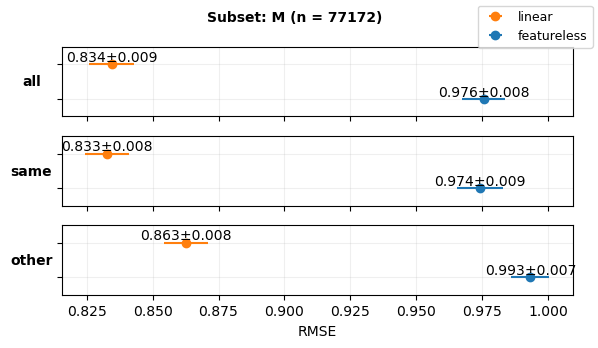

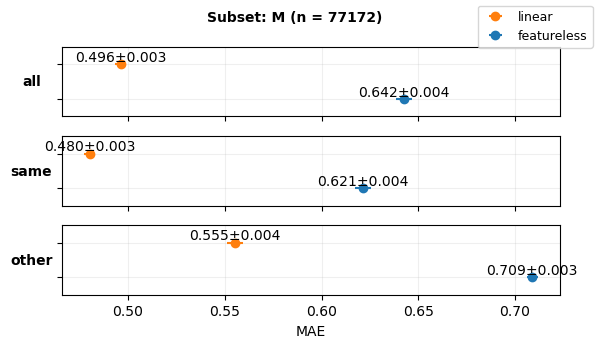

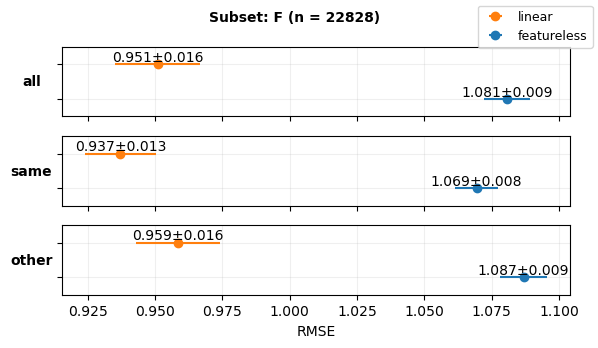

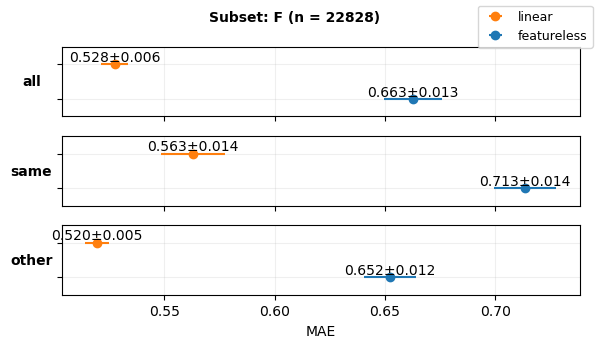

In [10]:
for value in ['M', 'F']:
    for metric in ['rmse', 'mae']:
        soak_obj.plot_metrics(results_df, value, subset_vec, metric, figsize=(6, 3.5))